# Prepare API

In [3]:
from influxdb_client import InfluxDBClient
import pandas as pd

with open("../../config.json", "r") as f:
    CONFIG = json.load(f)
    url = CONFIG["influx_url"]
    token = CONFIG["influx_token"]
    org = CONFIG["influx_org"]

client = InfluxDBClient(url=url, token=token, org=org)
bucket = "sdd"
query_api = client.query_api()

# Tests

## Get Map Data (ID, lat, lon)

In [55]:
fields = ["_field",
              "_value",
              "_id",
              "_measurement",
              "name",
              "ags",
              "bundesland",
              "landkreis",
              "city",
              "name",
              "dictrictType",
              "origin"]
query = f'''
from(bucket: "{bucket}")
|> range(start: -10d) 
|> filter(fn: (r) => r["_field"] == "lon" or r["_field"] == "lat")
|> group(columns:["lat", "lon"])
|> keep(columns: {json.dumps(fields)})
'''
tables = query_api.query_data_frame(query)
tables

,result,table,_value,_field,_id,_measurement,ags,bundesland,city,landkreis,name,origin
0,_result,0,11.003501,lon,142,hystreet,9562,Bayern,Erlangen,Erlangen,Hauptstraße (Süd),None
1,_result,0,11.003501,lon,142,hystreet,9562,Bayern,Erlangen,Erlangen,Hauptstraße (Süd),None
2,_result,0,11.003501,lon,142,hystreet,9562,Bayern,Erlangen,Erlangen,Hauptstraße (Süd),None
3,_result,0,11.003501,lon,142,hystreet,9562,Bayern,Erlangen,Erlangen,Hauptstraße (Süd),None
4,_result,0,11.003501,lon,142,hystreet,9562,Bayern,Erlangen,Erlangen,Hauptstraße (Süd),None
...,...,...,...,...,...,...,...,...,...,...,...,...
7955,_result,0,50.813754,lat,ChIJ7wP1gzBgv0cRqE8j8p1Q8vM,google_maps,5334,Nordrhein-Westfalen,None,Städteregion Aachen,Eschweiler Hbf,https://www.google.com/maps/place/?q=place_id:...
7956,_result,0,50.813754,lat,ChIJ7wP1gzBgv0cRqE8j8p1Q8vM,google_maps,5334,Nordrhein-Westfalen,None,Städteregion Aachen,Eschweiler Hbf,https://www.google.com/maps/place/?q=place_id:...
7957,_result,0,50.813754,lat,ChIJ7wP1gzBgv0cRqE8j8p1Q8vM,google_maps,5334,Nordrhein-Westfalen,None,Städteregion Aachen,Eschweiler Hbf,https://www.google.com/maps/place/?q=place_id:...
7958,_result,0,50.813754,lat,ChIJ7wP1gzBgv0cRqE8j8p1Q8vM,google_maps,5334,Nordrhein-Westfalen,None,Städteregion Aachen,Eschweiler Hbf,https://www.google.com/maps/place/?q=place_id:...


In [56]:
tables.drop_duplicates(inplace=True)
tables["c_id"] = tables.apply(lambda x: x["_measurement"]+"_"+str(x["_id"]), axis=1)  # make compound index
tables

,result,table,_value,_field,_id,_measurement,ags,bundesland,city,landkreis,name,origin,c_id
0,_result,0,11.003501,lon,142,hystreet,9562,Bayern,Erlangen,Erlangen,Hauptstraße (Süd),None,hystreet_142
5,_result,0,49.486140,lat,95,hystreet,8222,Baden-Württemberg,Mannheim,Mannheim,Planken (Mitte),None,hystreet_95
10,_result,0,8.047359,lon,108,hystreet,3404,Niedersachsen,Osnabrück,Osnabrück,Große Straße (Mitte),None,hystreet_108
15,_result,0,54.088427,lat,206,hystreet,13003,Mecklenburg-Vorpommern,Rostock,Rostock,Kröpeliner Straße (West),None,hystreet_206
20,_result,0,12.132454,lon,206,hystreet,13003,Mecklenburg-Vorpommern,Rostock,Rostock,Kröpeliner Straße (West),None,hystreet_206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7894,_result,0,51.178217,lat,ChIJnTvr1EQquUcRky9fg-U3NX0,google_maps,5120,Nordrhein-Westfalen,None,Remscheid,Remscheid Hbf,https://www.google.com/maps/place/?q=place_id:...,google_maps_ChIJnTvr1EQquUcRky9fg-U3NX0
7910,_result,0,49.512346,lat,ChIJf09aMwvhoUcRuG-c3OZKTTI,google_maps,9574,Bayern,None,Nürnberger Land,Lauf (rechts Pegnitz),https://www.google.com/maps/place/?q=place_id:...,google_maps_ChIJf09aMwvhoUcRuG-c3OZKTTI
7926,_result,0,11.004290,lon,ChIJXf5Pmt74oUcRJfDNH5JQO8M,google_maps,9562,Bayern,None,Erlangen,Erlangen Arcaden,https://www.google.com/maps/place/?q=place_id:...,google_maps_ChIJXf5Pmt74oUcRJfDNH5JQO8M
7939,_result,0,50.805871,lat,ChIJl5wkUE9ov0cR-w2sv9Y8gFk,google_maps,5358,Nordrhein-Westfalen,None,Düren,"Düren, StadtCenter",https://www.google.com/maps/place/?q=place_id:...,google_maps_ChIJl5wkUE9ov0cR-w2sv9Y8gFk


In [57]:
import geopandas as gpd
geo_table = tables[["_field", "_value", "c_id"]]
geo_table = geo_table.pivot(index='c_id', columns='_field', values='_value')
geo_table = round(geo_table, 5)
geo_table = gpd.GeoDataFrame(geo_table, geometry=gpd.points_from_xy(geo_table.lon, geo_table.lat))
geo_table

_field,lat,lon,geometry
c_id,,,
bikes_0,49.40672,8.69424,POINT (8.69424 49.40672)
bikes_1,47.61970,7.65932,POINT (7.65932 47.61970)
bikes_10,47.99521,7.84075,POINT (7.84075 47.99521)
bikes_11,49.00729,8.40272,POINT (8.40272 49.00729)
bikes_12,48.51802,9.04801,POINT (9.04801 48.51802)
...,...,...,...
hystreet_93,53.55210,9.98683,POINT (9.98683 53.55210)
hystreet_94,52.50376,13.32995,POINT (13.32995 52.50376)
hystreet_95,49.48614,8.47034,POINT (8.47034 49.48614)


## Append metadata (name, ags, bundesland, ...)

In [66]:
#metadata = tables[["_id", "ags", "bundesland", "city", "landkreis", "name", "origin"]]
metadata = tables.drop(columns=["result", "table", "_value", "_field"], errors="ignore")
metadata = metadata.set_index("c_id").drop_duplicates()
geo_table = geo_table.join(metadata)
geo_table

,lat,lon,geometry,_id,_measurement,ags,bundesland,city,landkreis,name,origin
c_id,,,,,,,,,,,
bikes_0,49.40672,8.69424,POINT (8.69424 49.40672),0,bikes,8221,Baden-Württemberg,None,Heidelberg,Heidelberg_2 (DE),None
bikes_1,47.61970,7.65932,POINT (7.65932 47.61970),1,bikes,8336,Baden-Württemberg,None,Lörrach,Loerrach (DE),None
bikes_10,47.99521,7.84075,POINT (7.84075 47.99521),10,bikes,8311,Baden-Württemberg,None,Freiburg im Breisgau,Freiburg (DE),None
bikes_11,49.00729,8.40272,POINT (8.40272 49.00729),11,bikes,8212,Baden-Württemberg,None,Karlsruhe,Karlsruhe (DE),None
bikes_12,48.51802,9.04801,POINT (9.04801 48.51802),12,bikes,8416,Baden-Württemberg,None,Tübingen,Tuebingen (DE),None
...,...,...,...,...,...,...,...,...,...,...,...
hystreet_93,53.55210,9.98683,POINT (9.98683 53.55210),93,hystreet,2000,Hamburg,Hamburg,Hamburg,Große Bleichen,None
hystreet_94,52.50376,13.32995,POINT (13.32995 52.50376),94,hystreet,11000,Berlin,Berlin,Berlin,Kurfürstendamm Nordseite (Ost),None
hystreet_95,49.48614,8.47034,POINT (8.47034 49.48614),95,hystreet,8222,Baden-Württemberg,Mannheim,Mannheim,Planken (Mitte),None


## Calculate 14-Day Trend

In [6]:
# MEASUREMENT: FIELDNAME
# airquality: airquality_score
# bikes: bike_count
# google_maps: current_popularity
# google_maps: normal_popularity
# hystreet: pedestrian_count
# webcam: personenzahl
fieldnames = {
    "airquality": "airquality_score",
    "bikes": "bike_count",
    "google_maps": "current_popularity",
    # "google_maps": "normal_popularity",
    "hystreet": "pedestrian_count",
    "webcam": "personenzahl"
}
filterstring = " or ".join([f'r["_field"] == "{x}"' for x in fieldnames.values()])
query = f'''
        from(bucket: "{bucket}")
      |> range(start: -14d)
      |> filter(fn: (r) =>  {filterstring})
      '''
tables = query_api.query_data_frame(query)
df = pd.concat(tables)
df["_id"] = df.apply(lambda x: x["_measurement"]+"_"+str(x["_id"]), axis=1) # make compound index

In [133]:
import numpy as np
from tqdm import tqdm
from datetime import timedelta, datetime
import warnings
warnings.simplefilter('ignore', np.RankWarning)

models = {}
trend = {}
df["unixtime"]=df["_time"].apply(lambda x:int(x.timestamp()),1) # unixtime in s

# calculate trend over last days
TRENDWINDOW = 7  # days
for idx in tqdm(set(df["_id"])):
    # get sub-dataframe for this id
    tmpdf = df[df["_id"]==idx].sort_values(by=["unixtime"])
    
    # remove too old data
    lastday = max(tmpdf["_time"])
    day0 = lastday - timedelta(days=TRENDWINDOW)
    tmpdf = tmpdf[tmpdf["_time"]>=day0]
    firstday = min(tmpdf["_time"])
    
    # note: day0 is the (theoretical) beginning of the trend window
    #       and firstday is the (actual) first day where data is available
    
    if (lastday-firstday).days < TRENDWINDOW:
        # not enough data for this station
        models[idx] = (np.nan,np.nan)
        trend[idx] = np.nan
        continue
    
    # linear regression y = a*x +b
    values=pd.to_numeric(tmpdf["_value"])
    model = np.polyfit(tmpdf["unixtime"], values, 1)
    a,b = model
    models[idx]= model 
    
    # calculate trend
    # 
    t1 = firstday.timestamp()
    t2 = lastday.timestamp()
    y1 = (a*t1+b)
    y2 = (a*t2+b)
    if y1>0:
        trend[idx] = y2/y1 - 1
    else:
        trend[idx] = np.nan

def applyfit(models,row):
    if row["_id"] in models:
        a,b = models[row["_id"]]
        return a*row["unixtime"] + b
    else:
        return np.nan
#df["fit"] = df.apply(lambda x: applyfit(models,x) ,axis=1)
df["trend"]  = df["_id"].map(trend)

100%|███████████████████████████████████████████████████████████████████████████████| 502/502 [00:02<00:00, 239.74it/s]


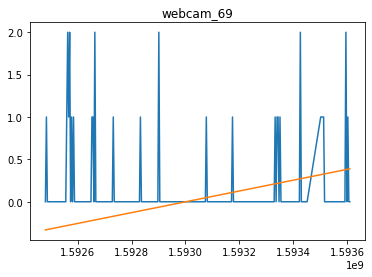

6.375558192926366e-07 -1015.6271147881565
1593005580.0 1593610380.0
y1: 0.002862906485233907
y2: 0.38845666599343076
134.68611758609111
Trend: 134.68611758609111


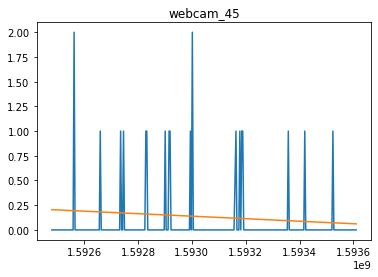

-1.2717137650430508e-07 202.72291876522408
1593005580.0 1593610380.0
y1: 0.13820637758519183
y2: 0.06129312907538065
-0.5565101253189352
Trend: -0.5565101253189352


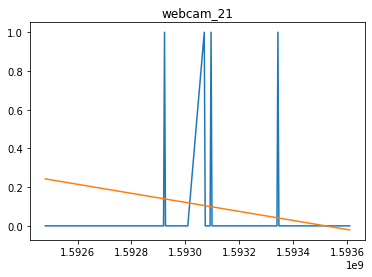

-2.3315780173702875e-07 371.54181498717514
1593005520.0 1593610320.0
y1: 0.12014978902277562
y2: -0.020864049467775203
-1.1736503212986933
Trend: -1.1736503212986933


In [129]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML

def plotandshow(tmp,disp=False):
    plt.plot(tmp["unixtime"],tmp["_value"])
    plt.plot(tmp["unixtime"],tmp["fitted"])
    idx = tmp.iloc[0]["_id"]
    plt.title(idx)
    plt.show()
    a,b = models[tmp.iloc[0]["_id"]]
    t2 = max(tmp["_time"])
    t1 = t2 - timedelta(days=TRENDWINDOW)
    t1 = t1.timestamp()
    t2 = t2.timestamp()
    print(a,b)
    print(t1,t2)
    print("y1:",(a*t1+b))
    print("y2:",(a*t2+b))
    print((a*t2+b)/(a*t1+b)-1)
    print("Trend:",trend[idx])
    if disp:
        display(tmp)

tmp=df[df["trend"]==max(trend.values())]
plotandshow(tmp)
tmp=df[df["_id"]==list(models.keys())[2]]
plotandshow(tmp)

tmp=df[df["trend"]==min(trend.values())]
idx=list(set(tmp["_id"]))[0]
tmp=df[df["_id"]==idx]
plotandshow(tmp)
